
# Parameter estimation and rate law determination



-   The rate constants in rate laws generally must be determined from experiments

-   We typically fit models to experimental data, and derive the rate constants from the fitted parameters

-   There are two general types of fitting
    -   linear regression
        -   fitting models that are linear in the parameters
    
    -   nonlinear regression
        -   fitting models that are nonlinear in the parameters

-   In either case we want to estimate the value of the parameters in the model, and the uncertainty in the parameters




## Linear regression review



-   In linear regression we fit a model that is linear in the parameters to some data.

-   The model parameters may be directly useful, e.g. the slope of a line may be related to a rate constant, or we may use the model to derive something, e.g. the derivative at some value.

-   A linear model is one like:

\begin{equation}
y = p_0 + p_1 f_1(x) + p_2 f_2(x) + \cdots
\end{equation}

-   Here the parameters are $p_i$ and the model is linear in them.
-   The functions $f_i(x)$ do not have to be linear
-   Some examples are:
    -   $ y = p_0 + p_1 x $ - a line
    -   $ y = p_0 + p_1 x + p_2 x^2 $ - a parabola
    -   $ y = p_0 + p_1 e^x $

-   We will write these in the general matrix algebra form:

\begin{equation}
\bf{y} = \bf{X} \bf{p}
\end{equation}

where:

\begin{equation}
\bf{y} = \left [
\begin{array}{c}
y_1 \\
y_2 \\
\vdots \\
y_n\\
\end{array}
\right ]
\end{equation}

\begin{equation}
\bf{X} = \left [ \begin{array}{cccc}
f_n(x_1) & \cdots & f_1(x_1) & 1 \\
f_n(x_2) & \cdots & f_1(x_2) & 1 \\
\vdots & \vdots   & \vdots   & \vdots \\
f_n(x_n) & \cdots & f_1(x_n) & 1 \\
\end{array}
\right ]
\end{equation}

and $ \bf{p} = \left [\begin{array}{c}p_n \\ p_{n-1} \\ \vdots \\ p_0 \end{array} \right ]  $

-   The model will usually not fit data perfectly, so we modify the model to include the errors

\begin{equation}
\bf{y} = \bf{X} \bf{p} + \bf{e}
\end{equation}

-   We want the best estimate for **p**, which means we want the  **p** that minimizes the error in the least squares sense (that is the magnitude of the sum of squared errors is minimized)

-   The best estimate for **p** is:

\begin{equation}
\bf{p} = (\bf{X}^T\bf{X})^{-1}\bf{X}^T \bf{y}
\end{equation}

-   There will typically be errors between the data and model with corresponding uncertainty in the estimated parameters

-   We need to quantify the uncertainty to determine how important it is in reactor design

Let us consider an example. We want to fit a line to the following data. The line has an equation $y = p_0 x + p_1$.

-   Remember

\begin{equation}
\bf{p} = (\bf{X}^T\bf{X})^{-1}\bf{X}^T \bf{y}
\end{equation}

Here we solve a prototypical problem of fitting a line to some data. We are given some x and y data, and we want to fit a line.

[numpy.column_stack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html)

-   You should always plot the fitted function over the data to visually assess the quality of the fit

The slope is -0.3145221843003413 
and intercept is 0.000624573378839699


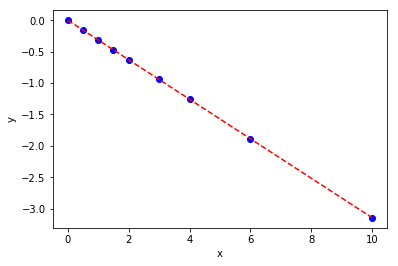

In [1]:
import numpy as np
x = np.array([0, 0.5, 1, 1.5, 2.0, 3.0, 4.0, 6.0, 10])
y = np.array([0, -0.157, -0.315, -0.472, -0.629, -0.942, -1.255, -1.884, -3.147])

X = np.column_stack([x, x**0])

#  I find these intermediate variables make it easier to read
XTX = np.matmul(X.T, X)
XTy = np.dot(X.T, y)

p = np.dot(np.linalg.inv(XTX), XTy)
slope, intercept = p # note the order in X
print('The slope is {0} \nand intercept is {1}'.format(slope, intercept))

# plot data and fit
import matplotlib.pyplot as plt

plt.plot(x, y, 'bo')
plt.plot(x, np.dot(X, p), 'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('images/la-line-fit.png')
plt.show()

The slope is -0.3130827080288672 
and intercept is -0.0010957088645593416


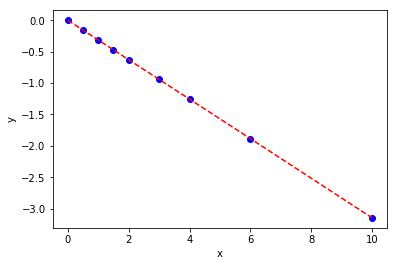

In [2]:
import numpy as np
x = np.array([0, 0.5, 1, 1.5, 2.0, 3.0, 4.0, 6.0, 10])
y = np.array([0, -0.157, -0.315, -0.472, -0.629, -0.942, -1.255, -1.884, -3.147])

X = np.column_stack([x**2, x, x**0])

#  I find these intermediate variables make it easier to read
XTX = np.dot(X.T, X)
XTy = np.dot(X.T, y)

p = np.dot(np.linalg.inv(XTX), XTy)
test, slope, intercept = p # note the order in X
print('The slope is {0} \nand intercept is {1}'.format(slope, intercept))

# plot data and fit
import matplotlib.pyplot as plt

plt.plot(x, y, 'bo')
plt.plot(x, np.dot(X, p), 'r--')
plt.xlabel('x')
plt.ylabel('y')
# plt.savefig('images/la-line-fit.png')
plt.show()

#### Exercise

Redo the last example by defining a function to calculate the summed squared error between the model and data, and use fmin to minimize the summed squared error. Show that you get the same parameters.

-   The error in the fit is defined as: $\bf{e} = \bf{y} - \bf{X}\cdot \bf{p}$

-   We can compute the summed squared error as $SSE = \bf{e} \cdot \bf{e}$
-   We define $SST = \sum (\bf{y} - \overline{y})^2 = (\bf{y} - \overline{y})\cdot(\bf{y} - \overline{y})$

-   We can use that to compute $R^2 = 1 - SSE/SST$ which roughly corresponds to the fraction of variance in the data explained by the model.

-   Let us calculate the R^2 value.



In [3]:
import numpy as np
np.set_printoptions(precision=4)
import pprint

x = np.array([0, 0.5, 1, 1.5, 2.0, 3.0, 4.0, 6.0, 10])
y = np.array([0, -0.157, -0.315, -0.472, -0.629, -0.942, -1.255, -1.884, -3.147])

X = np.column_stack([x, x**0])

#  I find these intermediate variables make it easier to read
XTX = np.dot(X.T, X)
XTy = np.dot(X.T, y)

p = np.dot(np.linalg.inv(XTX), XTy)

e = y - np.dot(X,p)
pprint.pprint(e)

SSE = np.dot(e, e)

yb = y - np.mean(y)
SST = np.dot(yb, yb)
Rsq = 1 - SSE/SST

print('R-squared = {0} '.format(Rsq))

array([-0.0006, -0.0004, -0.0011, -0.0008, -0.0006,  0.0009,  0.0025,
        0.0025, -0.0024])
R-squared = 0.9999972914903201 


-   The R^2 tells you how much of the variation in the data is explained by the model.
    -   a value of 1 tells you all the variation is explained
    -   values less than one means the model is incomplete in some way
    -   Here the value is close to one, which suggests a good fit

-   It is important to consider the uncertainty on the parameters

-   pycse has a `regress` function for that
    -   We specify a confidence level, typically 95%
    -   &alpha; = (100 - %confidence level)/100
    -   Let us apply that to the same data set

[pycse.regress](https://www.google.com/#safe=off&q=pycse.regress)



In [4]:
from pycse import regress
import numpy as np
x = np.array([0, 0.5, 1, 1.5, 2.0, 3.0, 4.0, 6.0, 10])
y = np.array([0, -0.157, -0.315, -0.472, -0.629, -0.942, -1.255, -1.884, -3.147])

X = np.column_stack([x, x**0])

# Choose 95% confidence level
alpha = 1 - 0.95
p, pint, se = regress(X, y, alpha)
slope_interval, intercept_interval = pint

print('The slope is between {0} \n'
      'at the 95% confidence level'.format(slope_interval))

print('The intercept is between {0} \n'
      'at the 95% confidence level'.format(intercept_interval))

The slope is between [-0.315 -0.314] 
at the 95% confidence level
The intercept is between [-0.0014  0.0027] 
at the 95% confidence level


-   Note in this case that the second parameter includes 0
    -   We cannot conclude that this parameter is significant.
    -   A simpler model with the intercept fixed at 0 might be better

-   The size of the confidence intervals depends on the number of data points, the number of estimated parameters, and the confidence level.

Read the [regress](https://github.com/jkitchin/pycse/blob/master/pycse/PYCSE.py#L7) source code to learn how the confidence intervals are calculated.




## Applications in determining a rate constant and reaction order



-   Rate constants and reaction orders are determined by using models that are fit to experimental data

-   A common case is to monitor concentration vs. time in a constant volume, batch reactor

-   We consider the disappearance of $A$

-   From the mole balance we know:

\begin{equation}
\frac{dN_A}{dt} = r_A V
\end{equation}

-   Let us assume the rate law is of the form: $r_A = k C_A^\alpha$ and a constant volume so that:

\begin{equation}
\frac{dC_A}{dt} = -k C_A^\alpha
\end{equation}

-   Let us be loose with mathematics, rearrange the equation, and take the log of both sides.
    -   By loose I mean we take logs of quantities that are not dimensionless

\begin{equation}
\ln(-\frac{dC_A}{dt}) = \ln{k} + \alpha \ln C_A
\end{equation}

-   This suggests that if we could numerically compute $\frac{dC_A}{dt}$ from our data of $C_A(t)$ then a plot of the log of the negative derivative vs the log of concentration would have
    -   an intercept equal to the log of the rate constant, $k$
    -   and a slope equal to the reaction order $\alpha$

-   Given the following data, determine the reaction order in A and the rate constant with 95% confidence intervals.

<table id="orgfd5ae74" border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">


<colgroup>
<col  class="org-right" />

<col  class="org-right" />
</colgroup>
<thead>
<tr>
<th scope="col" class="org-right">time (min)</th>
<th scope="col" class="org-right">C\_A (mol/L)</th>
</tr>
</thead>

<tbody>
<tr>
<td class="org-right">0</td>
<td class="org-right">0.0500</td>
</tr>


<tr>
<td class="org-right">50</td>
<td class="org-right">0.0380</td>
</tr>


<tr>
<td class="org-right">100</td>
<td class="org-right">0.0306</td>
</tr>


<tr>
<td class="org-right">150</td>
<td class="org-right">0.0256</td>
</tr>


<tr>
<td class="org-right">200</td>
<td class="org-right">0.0222</td>
</tr>


<tr>
<td class="org-right">250</td>
<td class="org-right">0.0195</td>
</tr>


<tr>
<td class="org-right">300</td>
<td class="org-right">0.0174</td>
</tr>
</tbody>
</table>

-   We will use the `pycse.deriv` function to numerically compute centered 2-point finite difference approximations to the derivatives
-   This works best when the $x$ points are evenly spaced, and they should be monotically increasing or decreasing

[pycse.deriv](https://www.google.com/#safe=off&q=pycse.deriv)

Read the [deriv](https://github.com/jkitchin/pycse/blob/master/pycse/PYCSE.py#L182) source code to learn how the derivatives are approximated, and what options are available.

-   Note that we are actually using the data in table [tab-data>](tab-data>)in this code block!

-   We do not have to type the data in ourselves.

-   This causes some false reporting in pyflakes.



So, we need to convert the list of numbers to a numpy array so we can do the analysis.



In [7]:
import numpy as np
np.set_printoptions(precision=3)  # alternate approach to printing accuracy
from pycse import deriv, regress
import matplotlib.pyplot as plt

# data will be a 2d list, which we convert to an array here
data = np.array(data)
t = data[:, 0]   # column 0
Ca = data[:, 1]  # column 1

# calculate numerical derivatives
dCadt = deriv(t, Ca)

# do the transformation
x = np.log(Ca)
y = np.log(-dCadt)

# setup and do the regression
# column of ones and x:  y = b + mx
X = np.column_stack([x**0, x])

p, pint, se = regress(X, y, 0.05)

intercept_range = pint[0]
alpha_range = pint[1]

k = np.exp(intercept_range)

print('alpha = {0} at the 95% confidence level'.format(alpha_range))
print('k = {0} at the 95% confidence level'.format(k))

# always visually inspect the fit
plt.plot(x, y,'ko ')
plt.plot(x, np.dot(X, p))
plt.xlabel('$\ln(C_A)$')
plt.ylabel('$\ln(-dC_A/dt)$')
plt.savefig('images/regression-rate.png')

NameError: name 'data' is not defined

![img](./images/regression-rate.png)

-   You can see there is a reasonably large range of values for the rate constant and reaction order (although the confidence interval does not contain zero)

-   The fit looks ok, but you can see the errors are not exactly random
    -   There seems to be systematic trends in a sigmoidal shape of the data
    -   That suggests small inadequacy in the model

-   Let us examine some methods of evaluating the quality of fit

-   First we examine the residuals, or the errors between the data and the model.

-   In a good fit, these will be randomly distributed

-   In a less good fit, there will be trends



In [ ]:
import numpy as np
np.set_printoptions(precision=3)
from pycse import deriv, regress
import matplotlib.pyplot as plt

# data will be a 2d list, which we convert to an array here
data = np.array(data)
t = data[:, 0]
Ca = data[:, 1]

# calculate numerical derivatives
dCadt = deriv(t, Ca)

# do the transformation
x = np.log(Ca)
y = np.log(-dCadt)

# setup and do the regression
# column of ones and x:  y = b + mx
X = np.column_stack([x**0, x])

p, pint, se = regress(X, y, 0.05)

residuals = y - np.dot(X, p)

# always visually inspect the fit
plt.plot(x, residuals, 'ko-')
plt.xlabel('$\ln(C_A)$')
plt.ylabel('residuals')
plt.savefig('images/regression-residuals.png')

![img](./images/regression-residuals.png)

-   You can see there are trends in this data
    -   That means the model may not be complete

-   There is uncertainty in the data
    -   In each concentration measurement there is uncertainty in the time and value of concentration
    -   You need more data to reduce the uncertainty
    -   You may also need better data to reduce the uncertainty

-   Derivatives tend to *magnify* errors in data
    -   The method we used to fit the data contributed to the uncertainty

-   We also *nonlinearly* transformed the errors by taking logs and exp of the data and results, which may have skewed the confidence limits




### Hybrid methods for data analysis



-   Numerical differentiation is noisy, but does the least amount of data manipulation, e.g. smoothing

-   Let us consider some hybrid approaches

-   The first hybrid method is to fit a polynomial to the Ca(t) data, and then analytically differentiate the polynomial

-   You must use some judgment about what order polynomial to fit
    -   Judgment comes from experience

[numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)  Fit a polynomial to data

[numpy.polyder](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyder.html)  Get the derivative of a polynomial

[numpy.polyval](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyval.html)  Evaluate a polynomial at some data points



In [ ]:
import numpy as np
np.set_printoptions(precision=3)

from pycse import regress
import matplotlib.pyplot as plt

# data will be a 2d list, which we convert to an array here
data = np.array(data)
t = data[:, 0]
Ca = data[:, 1]

pCa = np.polyfit(t, Ca, 4)

fCa = np.polyval(pCa, t)

print('Summed squared error = {}'.format(sum(fCa - Ca)**2))

# always visually inspect the fit
plt.plot(t, Ca, 'ko ')
plt.plot(t, fCa)
plt.xlabel('$t$ (min)')
plt.ylabel('$C_A$ (mol/L)')
plt.title('Polynomial fit to the data')
plt.savefig('images/polyfit-1.png')

# [[./images/polyfit-1.png]]

# get the derivative
dCadt = np.polyval(np.polyder(pCa), t)

# Construct the data we want to fit
# ln(-dCa/dt) = alpha ln(Ca) + ln(k)
x = np.log(Ca)
y = np.log(-dCadt)

X = np.column_stack([x**0, x])
p, pint, se = regress(X, y, 0.05)

intercept_range = pint[0]
alpha_range = pint[1]

k = np.exp(intercept_range)

print('alpha = {} at the 95% confidence level'.format(alpha_range))
print('k = {0} at the 95% confidence level'.format(k))

# always visually inspect the fit
plt.figure()
plt.plot(x, y, 'ko ')
plt.plot(x, np.dot(X, p))
plt.xlabel('$\ln(C_A)$')
plt.ylabel('$\ln(-dC_A/dt)$')
plt.savefig('images/poly-regression-rate.png')

![img](./images/poly-regression-rate.png)

-   Note the confidence intervals are tighter
-   That is because the polynomial fitting smooths some of the errors out
-   We still have nonlinearly transformed errors which may skew the confidence intervals




## Nonlinear regression review



-   Nonlinear models are abundant in reaction engineering
    -   $r = k C_A^n $ is linear in the $k$ parameter, and nonlinear in $n$

-   Nonlinear fitting is essentially a non-linear optimization problem

-   Unlike linear regression, where we directly compute the parameters using matrix algebra, we have to provide an initial guess and iterate to the solution

-   Similar to using fsolve, we must define a function of the model
    -   The function takes an independent variable, and parameters, f(x,a,b,&#x2026;)
    -   The function should return a value of $y$ for every value of $x$
    -   i.e. it should be vectorized

-   It is possible to formulate these problems as nonlinear minimization of summed squared errors. See [this example](http://jkitchin.github.io/blog/2013/02/18/Nonlinear-curve-fitting/).

-   The function `scipy.optimize.curve_fit` provides nonlinear fitting of models (functions) to data.

[scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

-   Here is an example usage.



a = 1.3275314145379786 and b=0.026461556970080666


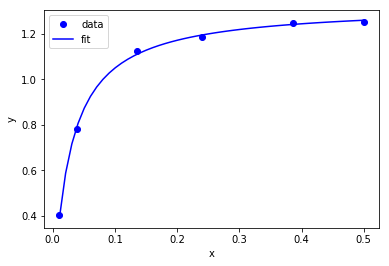

In [14]:
import numpy as np
from scipy.optimize import curve_fit

x = np.array([0.5, 0.387, 0.24, 0.136, 0.04, 0.011])
y = np.array([1.255, 1.25, 1.189, 1.124, 0.783, 0.402])

# this is the function we want to fit to our data
def func(x, a, b):
    'nonlinear function in a and b to fit to data'
    return a * x / (b + x)

initial_guess = [1.2, 0.03]

pars, pcov = curve_fit(func, x, y, p0=initial_guess)

a,b = pars
print('a = {0} and b={1}'.format(a,b))

import matplotlib.pyplot as plt
plt.plot(x,y,'bo ')
xfit = np.linspace(min(x), max(x))
yfit = func(xfit, *pars)
plt.plot(xfit,yfit,'b-')
plt.legend(['data','fit'],loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('images/nonlin-curve-fit.png')

![img](./images/nonlin-curve-fit.png)

-   Again, you should always visually inspect the fit

Practice: Repeat this last example by creating a function that calculates the summed squared errors between a model function and the data. Use fmin to find the parameters that minimizes the summed squared error.

-   We also need to estimate uncertainties in nonlinear parameters

-   `pycse` provides a function for this: `nlinfit`.

[pycse.nlinfit](https://www.google.com/#safe=off&q=pycse.nlinfit)

Read the [nlinfit](https://github.com/jkitchin/pycse/blob/master/pycse/PYCSE.py#L53) source code to see how the confidence intervals are computed

Here is an example usage of nlinfit.



In [15]:
import numpy as np
np.set_printoptions(precision=3)
from pycse import nlinfit

x = np.array([0.5, 0.387, 0.24, 0.136, 0.04, 0.011])
y = np.array([1.255, 1.25, 1.189, 1.124, 0.783, 0.402])


def func(x, a, b):
    'nonlinear function in a and b to fit to data'
    return a * x / (b + x)

initial_guess = [1.2, 0.03]
alpha = 0.05
pars, pint, se = nlinfit(func, x, y, initial_guess, alpha)

aint, bint = np.array(pint)
print('The 95% confidence interval on a is {0}'.format(aint))
print('The 95% confidence interval on b is {0}'.format(bint))

The 95% confidence interval on a is [ 1.301  1.355]
The 95% confidence interval on b is [ 0.024  0.029]


-   Here the two intervals are relatively small, and do not include zero, suggesting both parameters are significant.

-   More importantly, the errors are not skewed by a nonlinear transformation.

-   Note you have to provide an initial guess.
    -   This will not always be easy to guess.
    -   There may be more than one minimum in the fit also, so different guesses may give different parameters.

